# OPTIMIZATION: ELECTRICITY FLOW COST
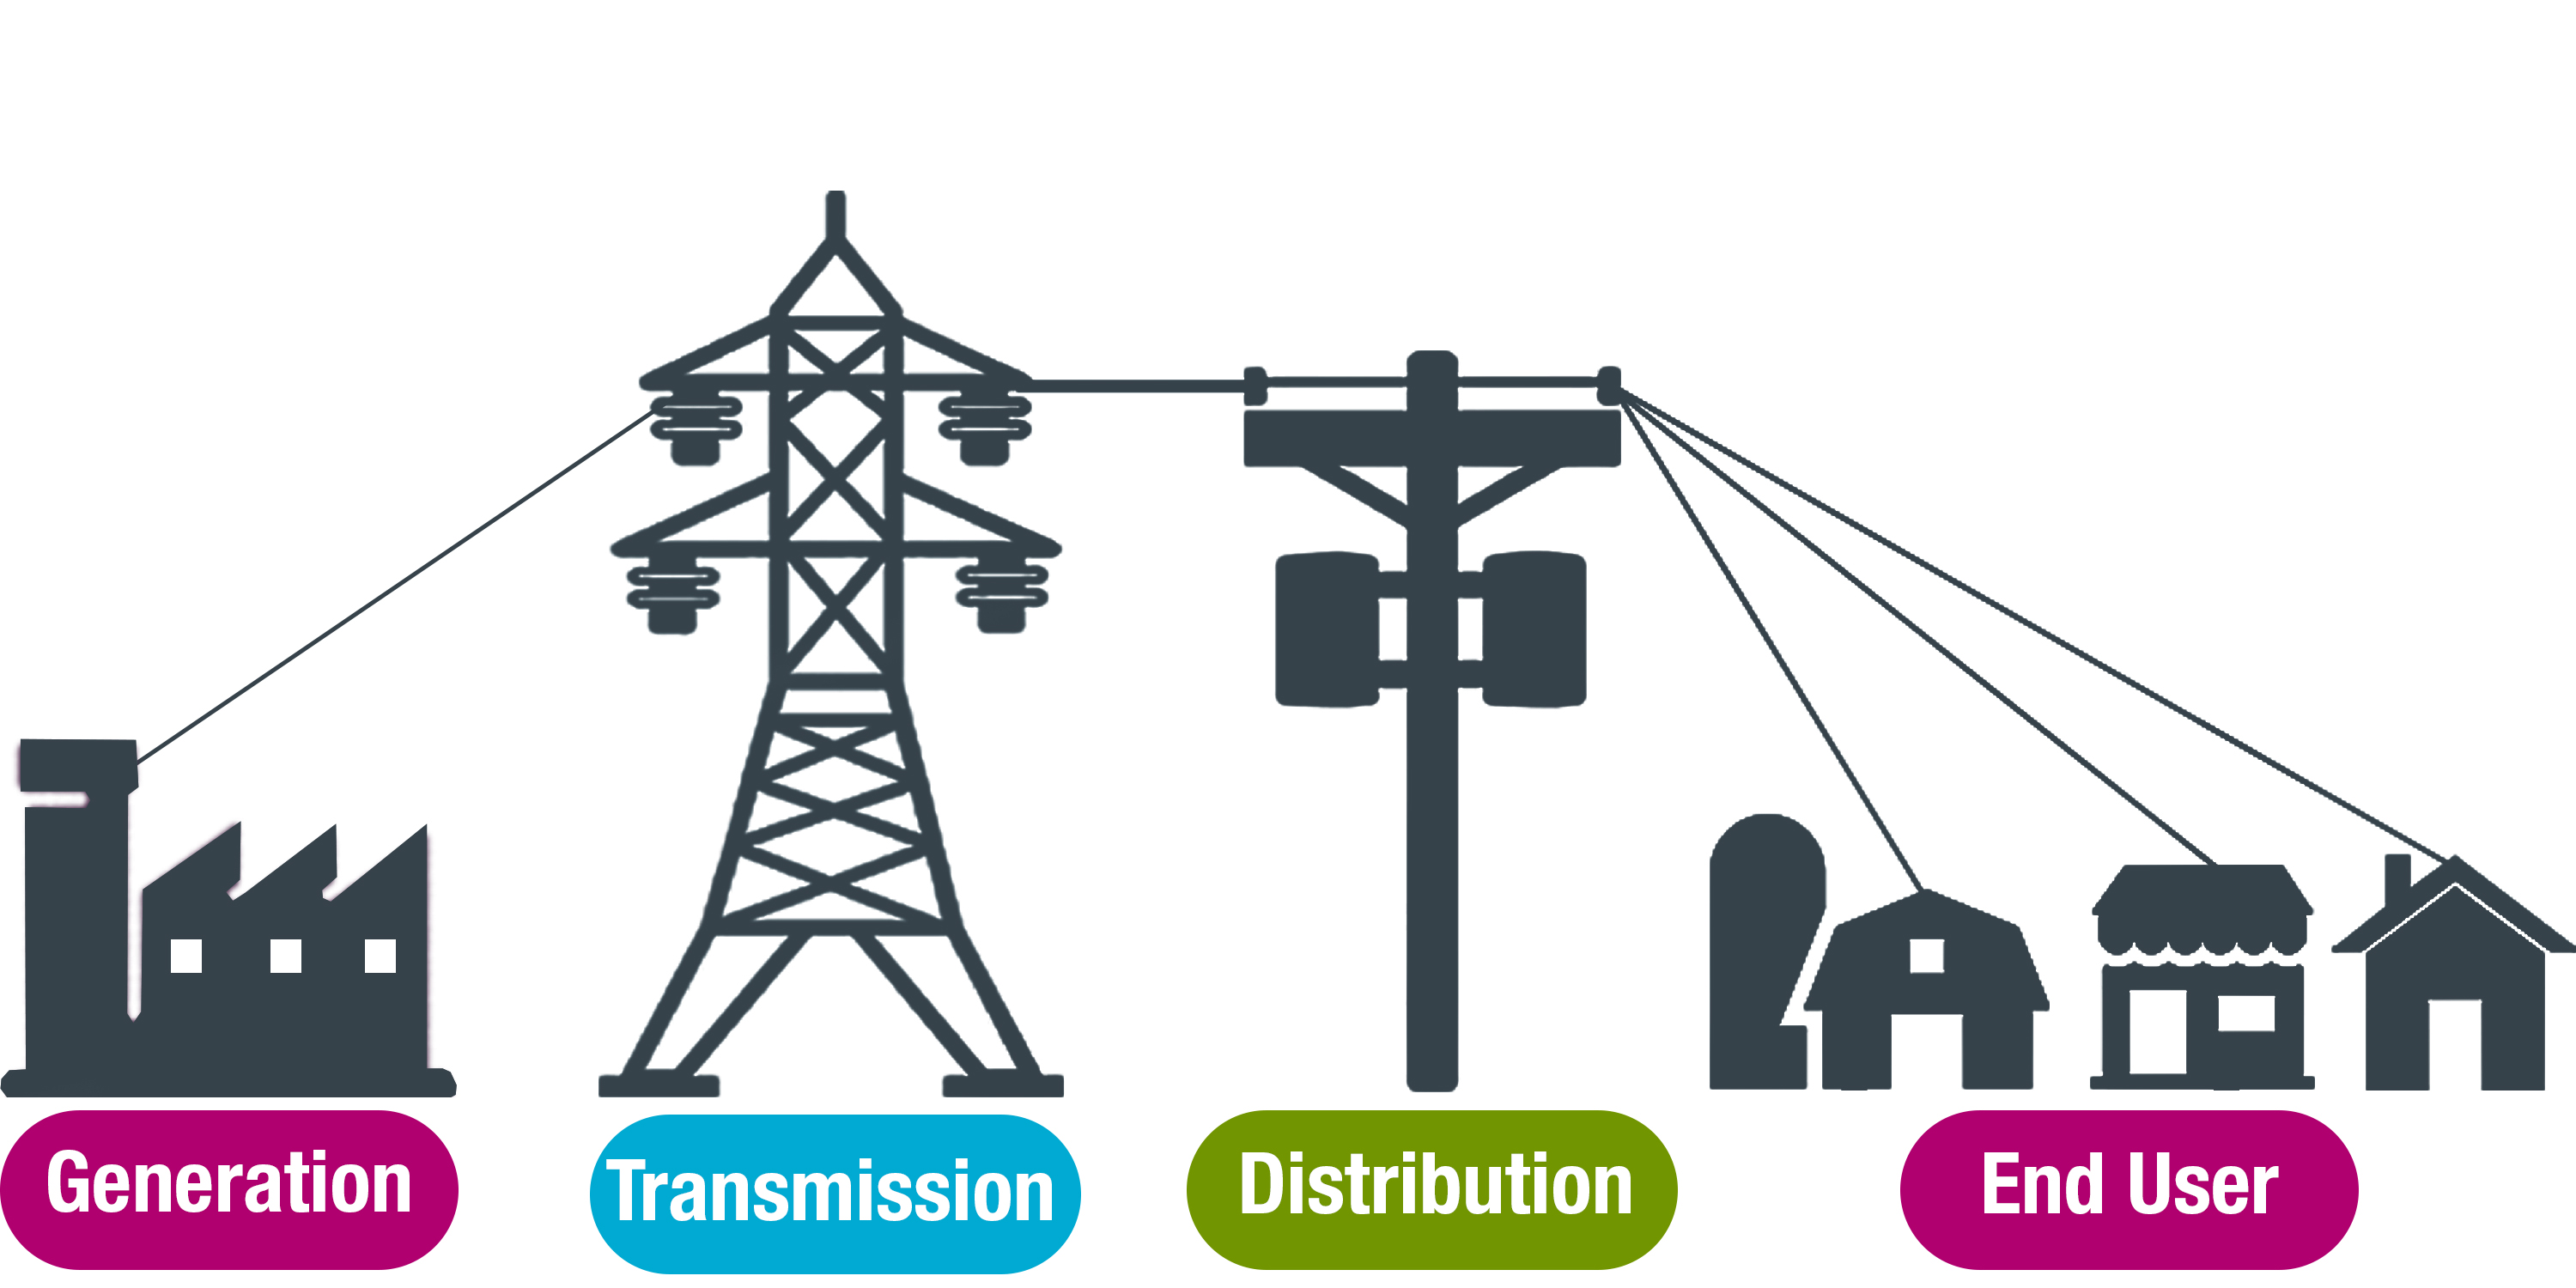

# PROBLEM STATEMENT

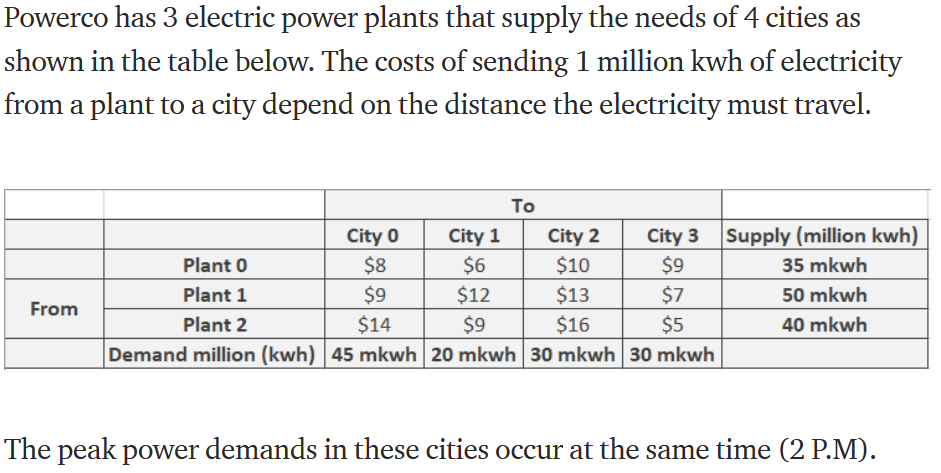

# OBJECTIVE

To obtain the optimal cost of meeting each city’s peak power demand.

# PROPOSED SOLUTION

Firstly, the problem at hand is a ‘Transportation Problem (TP)’ which is a special type of linear programming problem (LPP) wherein the objective is to minimize the cost of distributing a product (in our study it is the electricity transmitted) from a number of sources (power plants) to a number of destinations (cities).

We will be solving this TP by implementing the Gurobi Optimizer in Python as follows:

In [1]:
from gurobipy import *

The process of the proposed solution begins with identifying the sets from the problem statement. Plants 0, 1, 2 and Cities (0, 1, 2, 3) are the identified sets which can be modelled as follows:

# SETS

In [10]:
#Sets
plants = ["Plant 0","Plant 1","Plant 2"]
cities= ["0", "1", "2", "3"]
I = range(len(plants))
J = range(len(cities))

Next, we will input the data we have- this includes the cost matrix, the demand at each of the cities and the supply by each of the power plants as:

# DATA

In [11]:
#Data
#Cost of transmission from each plant to each city
Costs = [
    [8,6,10,9],
    [9,12,13,7],
    [14,9,16,15]
]
#Demand j at each city
Demand = [45, 20, 30, 30]
#Supply i from each power plant
Supply = [35, 50, 40]

Now the TP Model can be described as an LPP as:

# TP MODEL AS AN LPP

In [4]:
#Linear Programming Model
m= Model("LP Model")

Using license file C:\Users\reian\gurobi.lic
Academic license - for non-commercial use only


It is important to note that we do not have information about the number of (million) kwh produced and then supplied by a plant i which is further sent to a city j.

Thereby, let us now declare a variable:

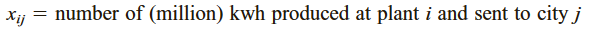

This can be fed into the LP model by declaring it as below:

# VARIABLE DENOTING THE TRANSMISSION AMOUNT FROM PLANT TO CITY

In [5]:
X = {}
for i in I:
    for j in J:
       X[i,j] = m.addVar() 

Further, mathematically, the optimal solution for the problem at hand would mean calculating the minimum cost associated with transmitting electricity from a plant to a city keeping in mind the supply and demand requirements.

The mathematical formulation of the objective would be:

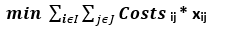

This can be incorporated in the TP using the Gurobi Optimizer as:

# OBJECTIVE FUNCTION

In [6]:
m.setObjective(quicksum(Costs[i][j]*X[i,j] for i in I for j in J), GRB.MINIMIZE)

Having specified all this, we will now include the constraints. This problem identifies 3 types of constraints- the demand constraint, the supply constraint and the non-negativity constraint. Out of these three, the non-negativity constraint is written as:

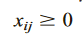

This constraint stresses on the fact that at any point, the number of kwh transmitted would be a positive amount. However, this is just written in theory and taken care of at the back-end by Gurobi.

The remaining 2 constraints can be explained as follows:

# CONSTRAINTS

Demand Constraint

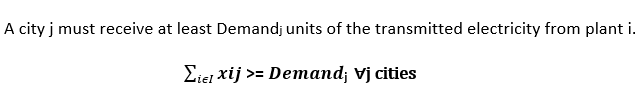

Supply Constraint

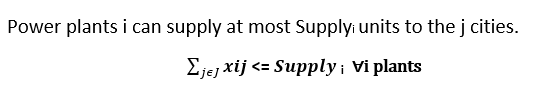

These constraints can be modelled using Gurobi in Python as:

In [16]:
# Demand Constraint  
for j in J:
    m.addConstr(quicksum(X[i,j] for i in I) >= Demand[j])
    
#Supply Constraint
for i in I:
    m.addConstr(quicksum(X[i,j] for j in J) <= Supply[i])

Our model has been now been formulated; let us print the optimized cost calculated by the Gurobi Optimizer.

# OPTIMIZED COST 

In [8]:
#Optimal Value
m.optimize()
print("Optimized Cost",m.objVal)

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 7 rows, 12 columns and 24 nonzeros
Model fingerprint: 0xd1b8c9e7
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 5e+01]
Presolve time: 0.01s
Presolved: 7 rows, 12 columns, 24 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.250000e+02   0.000000e+00      0s
       7    1.1900000e+03   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.02 seconds
Optimal objective  1.190000000e+03
Optimized Cost 1190.0


The above output suggests that the optimized cost to transmit electricity from the plants to the cities while abiding by the constraints comes to $1190.

Further, let’s get some insight into the proposed plan to see if we have satisfied all the conditions to arrive at the optimized cost by performing Sensitivity Analysis.

# SENSITIVITY ANALYSIS

In [9]:
#Demand for each city is met by supply from plants- Sensitivity Analysis       
for j in J:
    print("-"*30)
    print("Cities:",j, "Demand:",Demand[j])
    print("-"*30)   
    for i in I:
        print("   plants",i,X[i,j].x)

------------------------------
Cities: 0 Demand: 45
------------------------------
   plants 0 5.0
   plants 1 20.0
   plants 2 20.0
------------------------------
Cities: 1 Demand: 20
------------------------------
   plants 0 0.0
   plants 1 0.0
   plants 2 20.0
------------------------------
Cities: 2 Demand: 30
------------------------------
   plants 0 30.0
   plants 1 0.0
   plants 2 0.0
------------------------------
Cities: 3 Demand: 30
------------------------------
   plants 0 0.0
   plants 1 30.0
   plants 2 0.0


The output above proves that the demand for each city is met without exceeding the supply of any of the plants, say for instance- For City 0, the demand is 45 million kwh which is supplied using 5 million kwh from Plant 0, and 20 million kwh each from the other 2 plants; this still does not exhaust the maximum capacity supplied by each plant and the aggregate supplied by each of the plants to any of the cities stays within the supply limit for the overall model. This proves that the cost $1190 is the optimum cost of transmission.

In a nutshell, a snapshot of the supply meets demand transmission plan for $1190 can be viewed as:

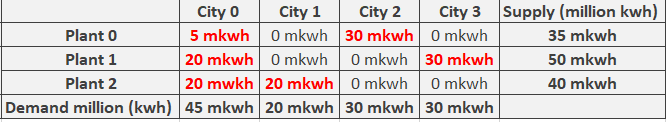